<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_Predictions_CIs_PIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 : Simple Linear Regression - Predictions, Confidence Intervals, and Prediction Intervals


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>Miles</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=14154g-4S0k9eGsqD8xlEmGahpyX79dH2" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [ ]:
#@title Read in Data

# Reading data in using read.csv via Base 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

Rows: 8037 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Description, Make, Call For Price, CarType, ForeignBased, Engine, ...
dbl  (3): Year, Price, Miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.

In [ ]:
#@title View the first few rows of data
head(FindCars)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010 Acura TL SH-AWD W/TECH W/HPT,2010,Acura,9995,No,151126,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,Black,Black,Eagle Motors WI,"Onalaska, WI",No
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2019 Acura TLX A-Spec,2019,Acura,NA,Yes,9707,Car,Yes,3.5L V6 SOHC 24V,Auto FWD,White,White,Shakopee Chevrolet,"Shakopee, MN",No
2010 Acura TSX,2010,Acura,6500,No,165000,Car,Yes,2.4L L4 DOHC 16V,Auto FWD,Gray,Gray,Midway Auto Sales,"Rochester, MN",No
2020 Audi A3 S line Premium 45 TF,2020,Audi,38940,No,0,Car,Yes,2.0L L4 DOHC 16V,Auto 4WD/AWD,Mythos Blk Met,NA,Park Place Motor Cars,"Rochester, MN",No
2021 Audi A4 Premium,2021,Audi,43805,No,0,Car,Yes,4 2.0 L,Auto,Glacier White Metallic,White,Park Place Motor Cars,"Rochester, MN",No


In [ ]:
FindCars_CarsOnly <- (FindCars
  %>% filter(CarType == "Car" & Miles > 25000 & Miles < 100000)
)

In [ ]:
head(FindCars_CarsOnly)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010 Acura TL SH-AWD W/TECH W/HPT,2010,Acura,9995,No,151126,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,Black,Black,Eagle Motors WI,"Onalaska, WI",No
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2019 Acura TLX A-Spec,2019,Acura,NA,Yes,9707,Car,Yes,3.5L V6 SOHC 24V,Auto FWD,White,White,Shakopee Chevrolet,"Shakopee, MN",No
2010 Acura TSX,2010,Acura,6500,No,165000,Car,Yes,2.4L L4 DOHC 16V,Auto FWD,Gray,Gray,Midway Auto Sales,"Rochester, MN",No
2018 Audi A4 Premium Plus,2018,Audi,30498,No,31949,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Matador Red Metallic,Red,Park Place Motor Cars,"Rochester, MN",No
2017 Audi A4 2.0T Premium quattro,2017,Audi,22987,No,75410,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Silver,Silver,Mercedes Benz of Roc..,"Rochester, MN",No


In [ ]:
dim(FindCars_CarsOnly)

[1] 568  15

## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: CurrentPrice</li>
  <li><strong>Independent / Predictor Variable</strong>: SquareFeet</li>
  <li><i>Assume</i> the following structure for the <strong>mean</strong> and <strong>variance</strong> functions</li>
  </ul>

<ul><ul>
  <li>$E(CurrentPrice | SquareFeet) = \beta_{0} + \beta_{1} * SquareFeet$</li>
  <li>$Var(CurrentPrice | SquareFeet) = \sigma^{2}$</li>
</ul></ul>

<u>Comments</u>

The mean function specified above is called a <strong>simple linear regression model</strong>: 

*   <strong>Simple</strong> implies a single predictor variable, i.e. SquareFeet
*   <strong>Linear</strong> implies the function is linear in its parameters, not in which the predictor variable are used in the model.  For example, the following mean function is a linear regression model because this model is linear in its parameters, but is not a straight line.
<br>
[Math Stuff]: A linear mean function implies the partial derivative with respect to any parameter is free of all other parameters.
*    The above variance function is simply a constant, generically labeled as $\sigma^2$.


## Simple Linear Regression - Scatterplot

Typically, the first step in doing a simple linear regression analysis is to create a scatterplot of the two variables.  The response variables goes on the y-axis and the independent / predictor variable goes on the x-axis.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


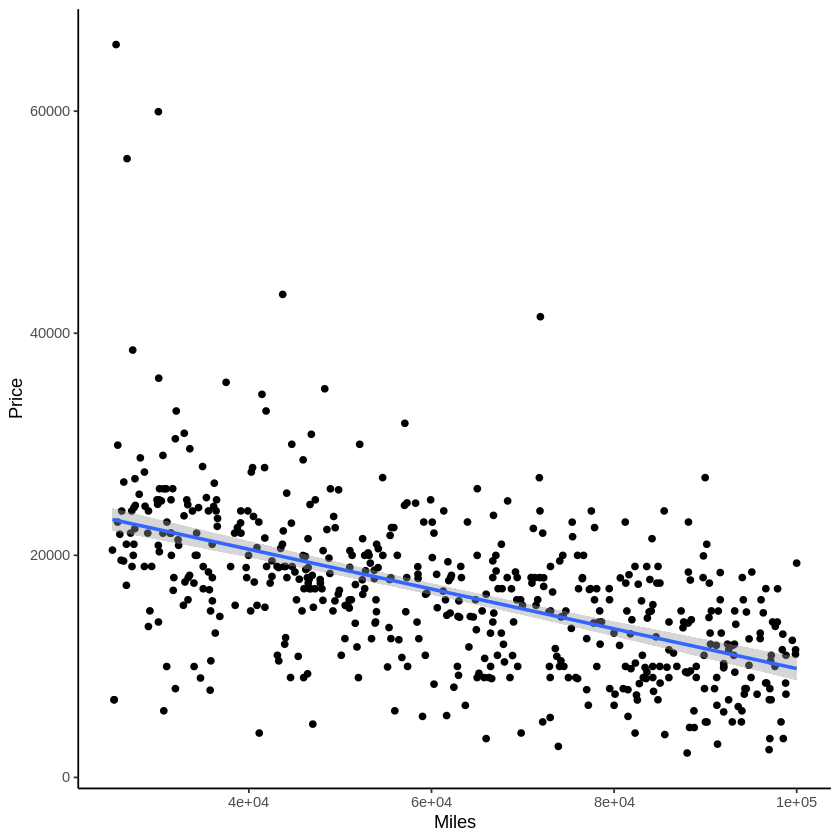

In [ ]:
#@title Scatterplot with simple linear regression line
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=TRUE) +  #adding a regression line to the plot without the standard error bands 
  theme_classic()

## Simple Linear Regression - Fitting the Model

In [ ]:
#@title Fitting the simple linear regression model
CarPrices_Model <- lm(Price ~ Miles, data=FindCars_CarsOnly)

The output from model fit is saved into an R object.

In [ ]:
#@title The model object
CarPrices_Model


Call:
lm(formula = Price ~ Miles, data = FindCars_CarsOnly)

Coefficients:
(Intercept)        Miles  
 24845.7833      -0.1047  


There are many elements attached to this object.  The names() function will identify the various elements.

In [ ]:
names(WinonaHomePrices_Model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

For example, to obtain the call that was used to build the simple linear regression model, $call can be added to the end of the object name.

In [ ]:
CarPrices_Model$call

lm(formula = CurrentPrice ~ SquareFeet, data = WinonaHomePrices)

In [ ]:
anova(WinonaHomePrices_Model)

ERROR: ignored

Fitting a restricted model, i.e. with just a y-intercept.

In [ ]:
anova(CarPrices_Model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Miles,1,404785665,404785665,21.96626,5.440533e-06
Year,1,226085370,226085370,12.26884,5.802355e-04
Residuals,181,3335397993,18427613,NA,NA


Getting the output for the coefficients.

In [ ]:
summary(CarPrices_Model)


Call:
lm(formula = Price ~ Miles, data = FindCars_CarsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-16348  -3592   -235   2950  42847 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.771e+04  7.996e+02   34.66   <2e-16 ***
Miles       -1.791e-01  1.216e-02  -14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6247 on 540 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2853 
F-statistic:   217 on 1 and 540 DF,  p-value: < 2.2e-16


End of Document